<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-rdvicen1/blob/main/titanic_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Que influyó en las muertes de pasajeros del Titanic?
 ¿La clase de pasaje? ¿La edad? ¿El costo del pasaje?

# Copie este notebook en su cuenta junto con los datos **titanic.csv** 
moodle de clase

In [ ]:
%cd <Su carpeta>

[Errno 2] No such file or directory: '<Su carpeta>'
/content


## Utilice estas librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import graphviz

## Lea el fichero de datos en un DataFrame de pandas **datos**

head para ver si se ha leido bien

In [ ]:
datos= pd.read_csv('titanic.csv')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Investigue si hay datos erróneos o vacios con valor **Nan** y elimínelos

solo necesitamos estas 4 columnas para ver si habia relacion entre precio de los boletos, edad y supervivencia.

In [ ]:
X= datos[["Survived", "Pclass", "Age", "Fare"]].dropna()

In [ ]:
X.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


## Con los datos límpios cree el conjunto de datos de entrenamiento
- **X** con las columnas 'Pclass','Age' y 'Fare' -> variable dependiente
- **y** con la columna 'Survived' -> variable independiente

In [ ]:
y=X["Survived"]
X=X.drop(["Survived"],axis=1)

se le quita los valores de la variable independiente(survived) a X con X.drop

## Cree el árbol de clasificación **Ad**

se importa arbol de decision clasificacion

Mas importante criterio de decisión y profundidad

Primero se crea el modelo y despues se ajusta con el fit

ya esta exportadod esde arriba aqui no haria falta

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Ad=DecisionTreeClassifier(criterion="gini",max_depth=5)
Ad=Ad.fit(X,y)

## Muestre árbol obtenido en forma de texto.

export test formula

In [ ]:
r = export_text(Ad, feature_names=list(X.columns))
print(r)

|--- Pclass <= 2.50
|   |--- Fare <= 13.65
|   |   |--- Age <= 50.50
|   |   |   |--- Age <= 39.50
|   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  37.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  39.50
|   |   |   |   |--- Fare <= 5.25
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  5.25
|   |   |   |   |   |--- class: 1
|   |   |--- Age >  50.50
|   |   |   |--- Age <= 60.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  60.50
|   |   |   |   |--- Age <= 64.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  64.00
|   |   |   |   |   |--- class: 0
|   |--- Fare >  13.65
|   |   |--- Age <= 42.50
|   |   |   |--- Age <= 17.50
|   |   |   |   |--- Fare <= 135.78
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  135.78
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  17.50
|   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Pclass 

## Exporte el árbol obtenido a un fichero **titanic.pdf**
Utilize la libreria graphviz

se utiliza mucho para graficos, sublenguaje para describir facilmente graphos

aqui utilizamos para generar pdf y ficheros imagen

dot.data es el arbol que vamos a utilizar en grafic

In [ ]:
dot_data = tree.export_graphviz(Ad, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Titanic")

'Titanic.pdf'

nodos: parametro x(0) que es la columna 0 tiene que ser <= 2,5, la columna es la clase

## Muestre de forma enriquecida el árbol obtenido
Utilize la libreria graphviz

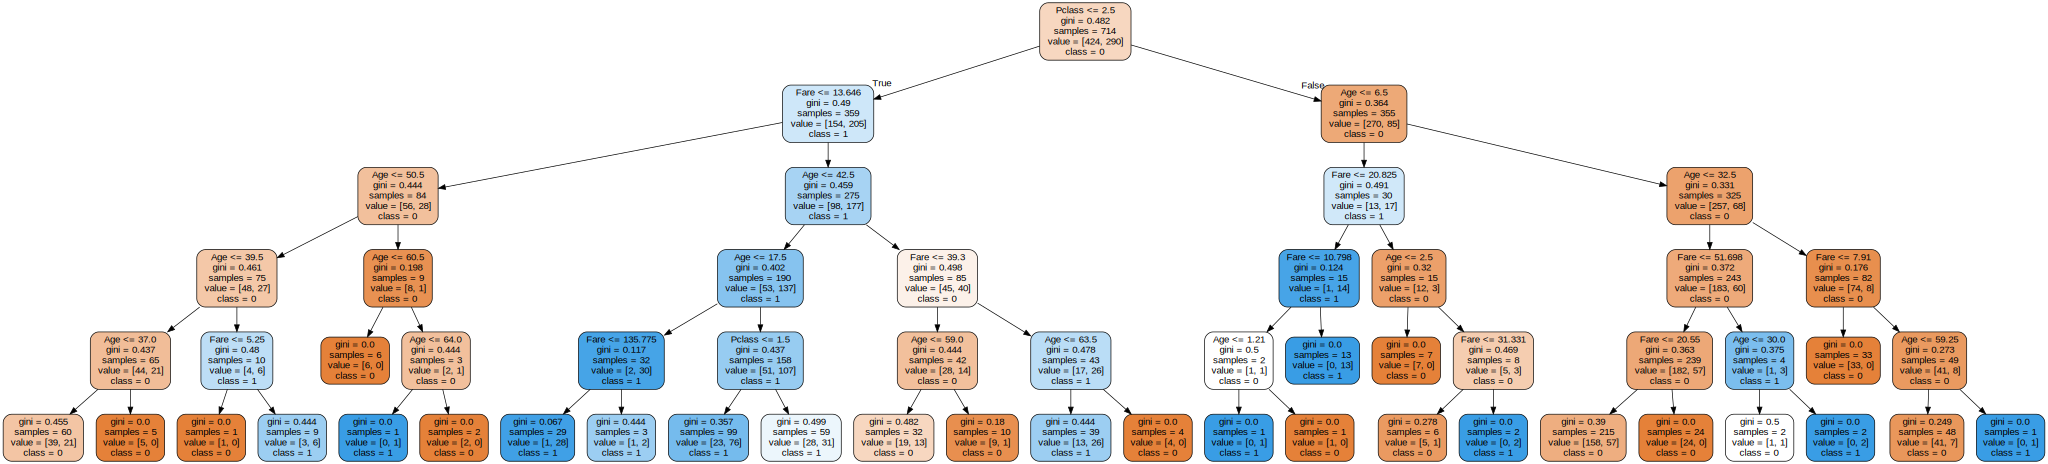

In [ ]:
dot_data = tree.export_graphviz(Ad, out_file=None,
                                feature_names=X.columns,
                                class_names=["0","1"],
                                filled="TRUE", rounded="TRUE")
graph = graphviz.Source(dot_data)
graph

si se salva azul completo, sino marrón y si un nodo representa elementos que se salvan y no se salvan -> mas azul si más se han salvado; más marrón si menos se han salvado

## ¿Que característas son las más influyentes o decisivas?

lista con caracteristicas mas relevantes

In [ ]:
l=list(zip(list(X.columns), Ad.feature_importances_))
print(l)

[('Pclass', 0.3886837616674941), ('Age', 0.30845301106297596), ('Fare', 0.30286322726953)]


## Realiza alguna inferencia.
Que propone para las filas 5 y 80 del Titanic.csv

saber que pasa para los individuos de la fila 5 a 80

In [ ]:
X.iloc[[5,80]]

,Pclass,Age,Fare
6,1,54.0,51.8625
103,3,33.0,8.6542


In [ ]:
Ad.predict(X.iloc[[5,80]].values)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

predict tiene que ser como vector, por eso .value para transformar el df a vector

array(1,0) dice que sobrevive 1